# Explicabilidad de Consultas Singleton a traves de un modelo de Regresión Logística

Algun texto alusivo al trabajo, medio introductorio. no mas de 1 parrafo

# Setup inicial

In [2]:
# Limpiamos el entorno
rm(list = ls())
gc(verbose = FALSE)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,623374,33.3,1352595,72.3,1352595,72.3
Vcells,1157086,8.9,8388608,64.0,1801053,13.8


## Instalación de Librerías

In [3]:
options(repos = c(CRAN = "http://cran.rstudio.com"))
install.packages("corrplot", verbose = FALSE) # permite personalizar colores y estilos de fuente para gráficos
install.packages("ggplot2", verbose = FALSE) # permite realizar gráficos con movimiento
install.packages("dplyr", verbose = FALSE) # permite manipular datos
install.packages("data.table", verbose = FALSE) #permite trabajar con tablas tabuladas
install.packages("e1071", verbose = FALSE)
install.packages("caret", verbose = FALSE)
install.packages("vioplot", verbose = FALSE)
install.packages("ROCR", verbose = FALSE)
install.packages("GGally", verbose = FALSE)
install.packages('broom', verbose = FALSE)
install.packages('modelr', verbose = FALSE)
install.packages("tidyverse", verbose = FALSE)
install.packages("furrr")
install.packages("tidymodels")
install.packages("OneR")

#installed.packages() # muestra los paquetes que están instalados en el dispositivo

Installing package into ‘/home/juan_bocco/.local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/juan_bocco/.local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/juan_bocco/.local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/juan_bocco/.local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/juan_bocco/.local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/juan_bocco/.local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/juan_bocco/.local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/juan_bocco/.local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/juan_bocco/.local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/juan_bocco/.local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/juan_bocc

In [4]:
require("corrplot") # permite personalizar colores y estilos de fuente para gráficos
require("ggplot2") # permite realizar gráficos con movimiento
require("dplyr") # permite manipular datos
require("data.table") #permite trabajar con tablas tabuladas

require("e1071")
require("caret")
require("vioplot")
require("ROCR")
require("GGally")
require("broom")

require("modelr")

require("tidyverse")
require("tidymodels")

require("dplyr")
require("purrr")
require("furrr")

require("OneR")

library(pROC)

Loading required package: corrplot

corrplot 0.92 loaded

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: e1071

Loading required package: caret

Loading required package: lattice

Loading required package: vioplot

Loading required package: sm

Package 'sm', version 2.2-5.7: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: ROCR

Loading required package: GGally

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg 

# Dataset

## Carga Dataset


Subir Dataset a Colab: 45min
Cargar Dataset en Colab: 1min

In [5]:
#df <- read.csv("~/buckets/b1/datasets/EEA/join4_with_headers_1_dia.csv")
df <- read.csv("~/buckets/b1/datasets/EEA/join4_with_headers.csv")
df <- data.frame(df)

## Exploración Dataset

In [6]:
dim(df)

[1] 20493966       34

In [7]:
nrow(df)

[1] 20493966

In [8]:
ncol(df)

[1] 34

In [9]:
names(df)

[1] "X"                         "id_consulta"              
 [3] "id_usuario"                "query_string"             
 [5] "hora_de_la_consulta"       "cantidad_caracteres"      
 [7] "numero_de_terminos"        "contiene_URL"             
 [9] "misspelled"                "largo_promedio_terminos"  
[11] "rank_number"               "hora_consulta"            
[13] "ctr"                       "ctr_top"                  
[15] "cant_consultas_realizadas" "max_dia_term"             
[17] "min_dia_term"              "avg_dia_term"             
[19] "max_hora_term"             "min_hora_term"            
[21] "avg_hora_term"             "max_min_term"             
[23] "min_min_term"              "avg_min_term"             
[25] "frec_consulta_dia"         "frec_consulta_hora"       
[27] "frec_consulta_min"         "Clase"                    
[29] "query_clean"               "query_tokens"             
[31] "query_tokens_stemmed"      "min_posting_count"        
[33] "max_posting_count"         "avg_posting_count"

In [10]:
head(df,10)

,X,id_consulta,id_usuario,query_string,hora_de_la_consulta,cantidad_caracteres,numero_de_terminos,contiene_URL,misspelled,largo_promedio_terminos,⋯,frec_consulta_dia,frec_consulta_hora,frec_consulta_min,Clase,query_clean,query_tokens,query_tokens_stemmed,min_posting_count,max_posting_count,avg_posting_count
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,0,6770104,3001225,hairball medicine,2006-03-01 00:01:03,16,2,0,0,8,⋯,1,1,1,Singleton,hairball medicine,"['hairball', 'medicine']","['hairbal', 'medicin']",14446,14446,2113447
2,1,19242008,3613173,batman signal images,2006-03-01 00:01:04,18,3,0,0,6,⋯,1,1,1,Singleton,batman signal images,"['batman', 'images', 'signal']","['batman', 'imag', 'signal']",443303,443303,9316631
3,2,6124336,50588,redirect.virtumundo.com,2006-03-01 00:01:05,23,1,1,0,23,⋯,15,2,1,NoSingleton,redirect.virtumundo.com,"['com', 'redirect', 'virtumundo']","['com', 'redirect', 'virtumundo']",129,129,25277948
4,3,4263488,978804,navyfcu.orghb,2006-03-01 00:01:05,13,1,1,0,13,⋯,1,1,1,Singleton,navyfcu.orghb,"['navyfcu', 'orghb']","['navyfcu', 'orghb']",10,10,10
5,4,6564570,2057661,desmoinesregister,2006-03-01 00:01:07,17,1,0,1,17,⋯,1,1,1,NoSingleton,desmoinesregister,['desmoinesregister'],['desmoinesregist'],1710,1710,1710
6,5,16673681,1127071,guardianship,2006-03-01 00:01:08,12,1,0,0,12,⋯,1,1,1,NoSingleton,guardianship,['guardianship'],['guardianship'],434185,434185,434185
7,6,11097631,3489966,tropical rain forest,2006-03-01 00:01:09,18,3,0,0,6,⋯,1,1,1,NoSingleton,tropical rain forest,"['forest', 'rain', 'tropical']","['forest', 'rain', 'tropic']",938014,938014,1943006
8,7,12632458,1162796,make a astronaut costume from items at home,2006-03-01 00:01:09,36,8,0,0,4,⋯,1,1,1,Singleton,make a astronaut costume from items at home,"['astronaut', 'at', 'costume', 'from', 'home', 'items', 'make']","['astronaut', 'at', 'costum', 'from', 'home', 'item', 'make']",182198,182198,58273552
9,8,13148019,3496052,cat,2006-03-01 00:01:09,3,1,0,0,3,⋯,3,1,1,NoSingleton,cat,['cat'],['cat'],5409836,5409836,5409836


In [11]:
glimpse(df)

Rows: 20,493,966
Columns: 34
$ X                         <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…
$ id_consulta               <int> 6770104, 19242008, 6124336, 4263488, 6564570…
$ id_usuario                <chr> "3001225", "3613173", "50588", "978804", "20…
$ query_string              <chr> "hairball medicine", "batman signal images",…
$ hora_de_la_consulta       <chr> "2006-03-01 00:01:03", "2006-03-01 00:01:04"…
$ cantidad_caracteres       <int> 16, 18, 23, 13, 17, 12, 18, 36, 3, 11, 10, 1…
$ numero_de_terminos        <int> 2, 3, 1, 1, 1, 1, 3, 8, 1, 2, 1, 3, 1, 3, 1,…
$ contiene_URL              <int> 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ misspelled                <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,…
$ largo_promedio_terminos   <int> 8, 6, 23, 13, 17, 12, 6, 4, 3, 5, 10, 6, 6, …
$ rank_number               <int> 0, 12, 0, 0, 0, 8, 1, 0, 0, 2, 1, 2, 1, 0, 0…
$ hora_consulta             <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ ctr      

In [12]:
# Se eliminan las variables que no se utilizarán
variables_a_eliminar <- c(
    "X",
    "id_consulta",
    "id_usuario",
    "query_string",
    "hora_de_la_consulta",
    "query_clean",
    "query_tokens",
    "query_tokens_stemmed",
    "min_posting_count",
    "max_posting_count",
    "avg_posting_count"
)

df <- df[,!names(df) %in% variables_a_eliminar]

In [13]:
glimpse(df)

Rows: 20,493,966
Columns: 23
$ cantidad_caracteres       <int> 16, 18, 23, 13, 17, 12, 18, 36, 3, 11, 10, 1…
$ numero_de_terminos        <int> 2, 3, 1, 1, 1, 1, 3, 8, 1, 2, 1, 3, 1, 3, 1,…
$ contiene_URL              <int> 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ misspelled                <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,…
$ largo_promedio_terminos   <int> 8, 6, 23, 13, 17, 12, 6, 4, 3, 5, 10, 6, 6, …
$ rank_number               <int> 0, 12, 0, 0, 0, 8, 1, 0, 0, 2, 1, 2, 1, 0, 0…
$ hora_consulta             <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ ctr                       <int> 0, 1, 0, 0, 1, 6, 1, 4, 0, 2, 1, 1, 1, 2, 0,…
$ ctr_top                   <int> 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 1, 0, 1, 1, 0,…
$ cant_consultas_realizadas <int> 1, 1, 1, 1, 4, 7, 1, 8, 2, 3, 1, 1, 1, 5, 2,…
$ max_dia_term              <int> 58, 122, 15, 1, 1, 4, 63, 2525, 161, 151, 7,…
$ min_dia_term              <int> 1, 16, 15, 1, 1, 4, 30, 9, 161, 14, 7, 1, 25…
$ avg_dia_t

In [14]:
summary(df)

 cantidad_caracteres numero_de_terminos  contiene_URL      misspelled    
 Min.   :  1.00      Min.   :  1.00     Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 10.00      1st Qu.:  1.00     1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 15.00      Median :  2.00     Median :0.0000   Median :0.0000  
 Mean   : 16.21      Mean   :  2.37     Mean   :0.2273   Mean   :0.4618  
 3rd Qu.: 21.00      3rd Qu.:  3.00     3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :500.00      Max.   :245.00     Max.   :1.0000   Max.   :1.0000  
 largo_promedio_terminos  rank_number      hora_consulta        ctr         
 Min.   :  1.000         Min.   :  0.000   Min.   : 0.00   Min.   :    0.0  
 1st Qu.:  5.000         1st Qu.:  0.000   1st Qu.:11.00   1st Qu.:    0.0  
 Median :  6.000         Median :  0.000   Median :16.00   Median :    1.0  
 Mean   :  8.326         Mean   :  1.044   Mean   :14.58   Mean   :  171.4  
 3rd Qu.: 10.000         3rd Qu.:  1.000   3rd Qu.:20.00   3rd Qu.:    3.0  
 Max.   :500.000    

In [15]:
arrange(data.frame(valores_unicos = lengths(lapply(df, unique))), valores_unicos)
arrange(data.frame(valores_unicos = lengths(lapply(df, unique))), -valores_unicos)

,valores_unicos
,<int>
contiene_URL,2
misspelled,2
Clase,2
hora_consulta,24
ctr_top,57
ctr,77
min_min_term,80
frec_consulta_min,80
avg_min_term,92


,valores_unicos
,<int>
avg_dia_term,4422
max_dia_term,2363
min_dia_term,2066
frec_consulta_dia,870
max_hora_term,612
cantidad_caracteres,481
avg_hora_term,445
rank_number,414
min_hora_term,414


In [16]:
as.data.frame(colSums(is.na(df)))

,colSums(is.na(df))
,<dbl>
cantidad_caracteres,0
numero_de_terminos,0
contiene_URL,0
misspelled,0
largo_promedio_terminos,0
rank_number,0
hora_consulta,0
ctr,0
ctr_top,0


In [17]:
summary(df$avg_posting_count)

Length  Class   Mode 
     0   NULL   NULL 

### Correlograma

In [18]:
df$Clase_num<- recode(df$Clase, 'Singleton' = 1, 'NoSingleton' =0)
numerico <- unlist(lapply(df, is.numeric), use.names = TRUE)  
dfnumerico <- df[ ,numerico]
cor(dfnumerico)


,cantidad_caracteres,numero_de_terminos,contiene_URL,misspelled,largo_promedio_terminos,rank_number,hora_consulta,ctr,ctr_top,cant_consultas_realizadas,⋯,max_hora_term,min_hora_term,avg_hora_term,max_min_term,min_min_term,avg_min_term,frec_consulta_dia,frec_consulta_hora,frec_consulta_min,Clase_num
cantidad_caracteres,1.000000000,0.733915395,0.072717872,0.0619954594,0.250516270,0.0297777932,0.001770660,-0.0011459627,-0.0012307967,-0.0011413042,⋯,0.252741890,-0.059355258,0.049847032,0.26026038,-0.05060363,0.026272943,-0.1670958510,-0.043797230,-0.037840363,0.4025343494
numero_de_terminos,0.733915395,1.000000000,-0.311468298,0.1261095899,-0.383811616,0.0898726319,-0.001692134,0.0091666008,0.0090588175,0.0091148313,⋯,0.418652873,-0.038882000,0.141973500,0.41727881,-0.03425498,0.089444991,-0.1250545258,-0.034729046,-0.032841682,0.3455701743
contiene_URL,0.072717872,-0.311468298,1.000000000,-0.3760524811,0.625197649,-0.1059310718,0.011795798,-0.0190130337,-0.0189628103,-0.0189135212,⋯,-0.161261806,-0.021811014,-0.090724927,-0.15741827,-0.01648637,-0.058984954,-0.0217968753,-0.008702773,-0.003324643,-0.0344628685
misspelled,0.061995459,0.126109590,-0.376052481,1.0000000000,-0.182602884,-0.0028280312,-0.002900231,0.0003980885,0.0003770914,0.0004015558,⋯,0.008169908,-0.045242056,-0.030332106,0.01942567,-0.03945887,-0.026923538,-0.1194974400,-0.036728138,-0.035224749,0.1495368066
largo_promedio_terminos,0.250516270,-0.383811616,0.625197649,-0.1826028837,1.000000000,-0.1017286479,0.006281783,-0.0175117363,-0.0174714542,-0.0173989528,⋯,-0.213863763,-0.024724686,-0.119884011,-0.20261830,-0.01698208,-0.074478465,-0.0468976413,-0.008774398,-0.002384328,0.0450015348
rank_number,0.029777793,0.089872632,-0.105931072,-0.0028280312,-0.101728648,1.0000000000,-0.007405488,0.0651581407,0.0650426916,0.0648405728,⋯,0.040009228,-0.008487267,0.012074129,0.02954317,-0.01216742,-0.003552093,-0.0169624669,-0.007886345,-0.007846559,0.0008084411
hora_consulta,0.001770660,-0.001692134,0.011795798,-0.0029002315,0.006281783,-0.0074054879,1.000000000,-0.0083848861,-0.0087009303,-0.0082857977,⋯,0.085238215,-0.015392261,0.032128911,0.07257963,-0.01505799,0.019759104,-0.0061725550,-0.022980391,-0.020776352,0.0012639768
ctr,-0.001145963,0.009166601,-0.019013034,0.0003980885,-0.017511736,0.0651581407,-0.008384886,1.0000000000,0.9997573393,0.9998806917,⋯,0.004720933,0.001558993,0.003267233,0.01652994,0.02321619,0.022696033,0.0007701229,0.001290913,0.023569618,-0.0330677338
ctr_top,-0.001230797,0.009058818,-0.018962810,0.0003770914,-0.017471454,0.0650426916,-0.008700930,0.9997573393,1.0000000000,0.9994074650,⋯,0.004621052,0.001561646,0.003228301,0.01642288,0.02319016,0.022642834,0.0008160514,0.001296096,0.023546344,-0.0331727614
cant_consultas_realizadas,-0.001141304,0.009114831,-0.018913521,0.0004015558,-0.017398953,0.0648405728,-0.008285798,0.9998806917,0.9994074650,1.0000000000,⋯,0.004697471,0.001558935,0.003256742,0.01653047,0.02323002,0.022714276,0.0007393391,0.001290185,0.023574199,-0.0329783188


In [19]:
cor.test(df$Clase_num, df$frec_consulta_min)


	Pearson's product-moment correlation

data:  df$Clase_num and df$frec_consulta_min
t = -193.32, df = 20493964, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04309639 -0.04223207
sample estimates:
        cor 
-0.04266424 


In [20]:
#ggplot(df, aes(x = frec_consulta_dia, fill=Clase)) +
#  geom_histogram(bins = 10, aes(y = ..density.., fill=Clase), position = "identity", alpha = 0.5, fill = "#1B9E77", color = "white")+
#  geom_density(alpha = 0.6)+
#  scale_fill_manual(values = c("#8795E8", "#FF6AD5"))+
#  theme(legend.position="top") + 
#  theme_classic()

In [21]:
#ggplot(df, aes(x = frec_consulta_dia, y = Clase)) + 
#  geom_point()

In [22]:
#ggplot(data = df, mapping = aes(x = frec_consulta_dia, y = Clase)) +
#  geom_point()

### Preparado del Data Set para el Modelo

In [23]:
df1 <- df

In [24]:
count(df, Clase)

Clase,n
<chr>,<int>
NoSingleton,11984971
Singleton,8508995


In [25]:
frecuencias <- table(df1$Clase)
prop.table(frecuencias)


NoSingleton   Singleton 
  0.5848049   0.4151951 

In [26]:
set.seed(1)
sample <- sample(c(TRUE, FALSE), nrow(df1), replace=TRUE, prob=c(0.7,0.3))
train  <- df1[sample, ]
test   <- df1[!sample, ]

In [27]:
dim(train)

[1] 14345087       24

In [28]:
dim(test)

[1] 6148879      24

In [29]:
prop.table(table(train$Clase))


NoSingleton   Singleton 
  0.5848349   0.4151651 

In [30]:
prop.table(table(test$Clase))


NoSingleton   Singleton 
  0.5847347   0.4152653 

In [31]:
# calculamos la distribución de clase en cada dataset
train_grafico <- train %>% 
  group_by(Clase) %>% 
  summarise(numero_casos=n()) %>%
  mutate(prop = round(prop.table(numero_casos)*100,2))
test_grafico <- test %>% 
  group_by(Clase) %>% 
  summarise(numero_casos=n()) %>%
  mutate(prop = round(prop.table(numero_casos)*100,2))
# armamos tabla conjunta para graficar
distrib = cbind(rbind(train_grafico, test_grafico), dataset = c("train_grafico", "train_grafico", "test_grafico", "test_grafico"))
distrib

Clase,numero_casos,prop,dataset
<chr>,<int>,<dbl>,<chr>
NoSingleton,8389508,58.48,train_grafico
Singleton,5955579,41.52,train_grafico
NoSingleton,3595463,58.47,test_grafico
Singleton,2553416,41.53,test_grafico


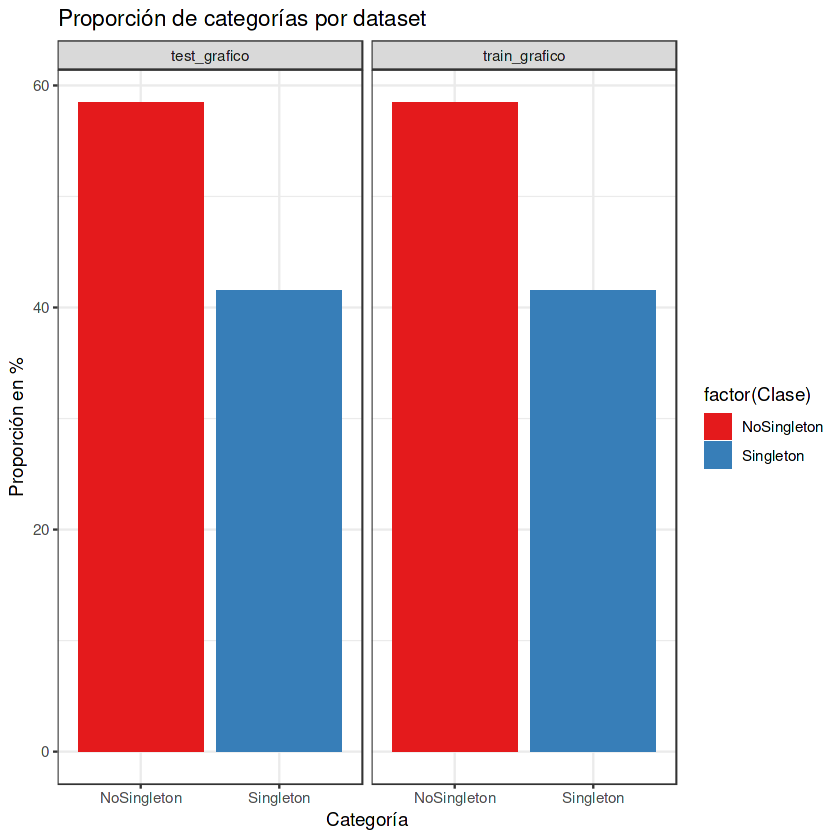

In [32]:
# graficamos las distribuciones
ggplot(distrib, aes(x = Clase, y = prop, fill = factor(Clase), label = prop)) + 
         geom_bar(stat="identity", position = "dodge") + facet_wrap(~ dataset) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x = "Categoría", y = "Proporción en %", title = "Proporción de categorías por dataset") + 
  theme_bw() +
  scale_fill_brewer(palette="Set1")

Vemos que estamos trabajando con un problema de clasificación con cierto desbalance de clase.

In [33]:
# graficamos con ggpairs coloreando por variable a predecir

#le agregué algunas columnas más, por alguna razón 'frec_consulta_hora' entrega error en la correlación

#g <- train %>% 
#        select("Clase", "numero_de_terminos", "largo_promedio_terminos", "min_min_term", "cantidad_caracteres", 
#"cant_consultas_realizadas") %>% 
#        ggpairs(title = "Correlograma de variables",
#                mapping = aes(colour= factor(Clase)),
#                progress = FALSE, 
#                lower=list(combo=wrap("facethist", binwidth=0.8))) +
#        theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
#        theme_bw() +
#        scale_fill_brewer(palette="Set1") +
#        scale_color_brewer(palette="Set1")
#g

In [34]:
train$Clase_num<- recode(train$Clase, 'Singleton' = 1, 'NoSingleton' =0)
numerico_train <- unlist(lapply(train, is.numeric), use.names = TRUE)  
dfnumerico_train <- train[ ,numerico_train]


In [35]:
#numero_de_terminos - 0.406660925
#contiene_URL - 0.3394753366
#largo_promedio_terminos - 0.1495914569
#min_min_term - 0.155030239

In [36]:
cor(dfnumerico_train)

,cantidad_caracteres,numero_de_terminos,contiene_URL,misspelled,largo_promedio_terminos,rank_number,hora_consulta,ctr,ctr_top,cant_consultas_realizadas,⋯,max_hora_term,min_hora_term,avg_hora_term,max_min_term,min_min_term,avg_min_term,frec_consulta_dia,frec_consulta_hora,frec_consulta_min,Clase_num
cantidad_caracteres,1.000000000,0.732966052,0.072852589,0.0617686037,0.252246275,0.0294954751,0.002000624,-0.0014096925,-0.0014925411,-0.0014047489,⋯,0.252380831,-0.059251055,0.049638525,0.25992842,-0.05079479,0.026016517,-0.1671075000,-0.043751512,-0.037874420,0.4024450391
numero_de_terminos,0.732966052,1.000000000,-0.311880354,0.1261045568,-0.383640428,0.0893367424,-0.001435050,0.0089711774,0.0088684539,0.0089172588,⋯,0.418606414,-0.038878067,0.141672211,0.41690412,-0.03481973,0.088591225,-0.1251764663,-0.034732757,-0.032893072,0.3458184858
contiene_URL,0.072852589,-0.311880354,1.000000000,-0.3760412225,0.624486689,-0.1054495615,0.011748605,-0.0191649939,-0.0191194889,-0.0190624929,⋯,-0.161176681,-0.021770720,-0.090539783,-0.15749004,-0.01651083,-0.059020667,-0.0218178463,-0.008703066,-0.003333960,-0.0344254699
misspelled,0.061768604,0.126104557,-0.376041222,1.0000000000,-0.182494319,-0.0027920351,-0.002958089,0.0002939649,0.0002734539,0.0002964687,⋯,0.008120941,-0.045192825,-0.030342042,0.01951822,-0.03948536,-0.026869318,-0.1194622492,-0.036702372,-0.035252594,0.1494340982
largo_promedio_terminos,0.252246275,-0.383640428,0.624486689,-0.1824943191,1.000000000,-0.1009912093,0.006250644,-0.0175672206,-0.0175317257,-0.0174520625,⋯,-0.213301652,-0.024596590,-0.119367616,-0.20218232,-0.01696236,-0.074258730,-0.0468019476,-0.008730714,-0.002403324,0.0448394386
rank_number,0.029495475,0.089336742,-0.105449561,-0.0027920351,-0.100991209,1.0000000000,-0.007533515,0.0655045685,0.0654171332,0.0651786440,⋯,0.039654733,-0.008424618,0.011969026,0.02922178,-0.01212752,-0.003581480,-0.0168911131,-0.007827725,-0.007858024,0.0006713542
hora_consulta,0.002000624,-0.001435050,0.011748605,-0.0029580891,0.006250644,-0.0075335151,1.000000000,-0.0085323423,-0.0088506157,-0.0084316378,⋯,0.085067934,-0.015529246,0.031869840,0.07255668,-0.01516858,0.019622602,-0.0062125588,-0.023088651,-0.020869604,0.0013274273
ctr,-0.001409692,0.008971177,-0.019164994,0.0002939649,-0.017567221,0.0655045685,-0.008532342,1.0000000000,0.9997571733,0.9998808754,⋯,0.004573559,0.001574561,0.003219792,0.01626222,0.02313613,0.022590609,0.0007928373,0.001290730,0.023468437,-0.0331421802
ctr_top,-0.001492541,0.008868454,-0.019119489,0.0002734539,-0.017531726,0.0654171332,-0.008850616,0.9997571733,1.0000000000,0.9994074979,⋯,0.004474422,0.001576115,0.003180617,0.01615701,0.02311104,0.022538990,0.0008318899,0.001294655,0.023445823,-0.0332469575
cant_consultas_realizadas,-0.001404749,0.008917259,-0.019062493,0.0002964687,-0.017452063,0.0651786440,-0.008431638,0.9998808754,0.9994074979,1.0000000000,⋯,0.004549507,0.001574793,0.003209018,0.01625966,0.02314775,0.022605406,0.0007640111,0.001290235,0.023470954,-0.0330487181


In [37]:
# modelo de regresión logística 
#glm1 <- glm(train, Clase ~ numero_de_terminos + largo_promedio_terminos + min_min_term, family = 'binomial')
# veo los resultados

#tidy(glm)

In [38]:
#df1$Clase <- as.factor(df1$Clase)

In [39]:
#log.model <- glm(formula = Clase ~ numero_de_terminos, data = train, family = 'binomial')

In [40]:
continuass <-select_if(train, is.numeric)

In [41]:
train$Clase_factor <- as.factor(train$Clase)

# Modelado

## Planteo del problema

En este caso vamos a tratar de resolver el problema de predecir si una búsqueda realizada por un usuario en un buscador será considerada o no como "singleton"

En particular, la regresión logística es útil para problemas de predicción de clases.

Queremos estimar P(singleton=1|X)=P(X) para cada búsqueda y a partir de ello poder definir un punto de corte para predecir cuáles serán las búsquedas que serán o no singleton.

## Regresión Logística

Aca explicar por qué hay que separar en TRAIN y TEST

Al que le contemos la película, tiene que saber que hay que separar porque después vamos a querer testeatr si el modelo se equivoca y en qué magnitud (Matriz Confusión + Curva ROC)

## Creación de formulas

El objetivo es poder evaluar varias formulas a la vez, por ellos se utilizará la libreria **modelr**.

In [42]:
# Creación de fórmulas
logit_formulas <- formulas(.response = ~ Clase_factor,
                           nroterminos = ~ log(numero_de_terminos),
                           largoterminos = ~ log(largo_promedio_terminos),
                           #NcLM = ~ log(numero_de_terminos) + log(largo_promedio_terminos) + log(min_min_term),
                           NcLM = ~ log(numero_de_terminos) + log(cantidad_caracteres) + log(min_dia_term),
                           full = ~ log(numero_de_terminos) + log(largo_promedio_terminos) + cantidad_caracteres + contiene_URL + misspelled + rank_number + hora_consulta + ctr + ctr_top + cant_consultas_realizadas + max_dia_term + log(min_dia_term) + avg_dia_term + max_hora_term + min_hora_term + avg_hora_term + max_min_term + min_min_term + avg_min_term,
                           LassoFS = ~ cantidad_caracteres + log(numero_de_terminos) + log(largo_promedio_terminos) + misspelled + rank_number + ctr + ctr_top + cant_consultas_realizadas + max_dia_term + log(min_dia_term) + min_hora_term + max_min_term + min_min_term + avg_min_term,
                           full_sin_hora = ~ log(numero_de_terminos) + log(largo_promedio_terminos) + cantidad_caracteres + contiene_URL + misspelled + rank_number + ctr + ctr_top + cant_consultas_realizadas + max_dia_term + log(min_dia_term) + avg_dia_term + max_hora_term + min_hora_term + avg_hora_term + max_min_term + min_min_term + avg_min_term
                           )
logit_formulas # observamos el objeto formulas

$nroterminos
Clase_factor ~ log(numero_de_terminos)

$largoterminos
Clase_factor ~ log(largo_promedio_terminos)

$NcLM
Clase_factor ~ log(numero_de_terminos) + log(cantidad_caracteres) + 
    log(min_dia_term)

$full
Clase_factor ~ log(numero_de_terminos) + log(largo_promedio_terminos) + 
    cantidad_caracteres + contiene_URL + misspelled + rank_number + 
    hora_consulta + ctr + ctr_top + cant_consultas_realizadas + 
    max_dia_term + log(min_dia_term) + avg_dia_term + max_hora_term + 
    min_hora_term + avg_hora_term + max_min_term + min_min_term + 
    avg_min_term

$LassoFS
Clase_factor ~ cantidad_caracteres + log(numero_de_terminos) + 
    log(largo_promedio_terminos) + misspelled + rank_number + 
    ctr + ctr_top + cant_consultas_realizadas + max_dia_term + 
    log(min_dia_term) + min_hora_term + max_min_term + min_min_term + 
    avg_min_term

$full_sin_hora
Clase_factor ~ log(numero_de_terminos) + log(largo_promedio_terminos) + 
    cantidad_caracteres + contiene_URL + mi

In [43]:
#train$f_frec_consulta_dia <- factor(train$frec_consulta_dia)
#train$f_frec_consulta_hora <- factor(train$frec_consulta_hora)
#train$f_frec_consulta_min <- factor(train$frec_consulta_min)

In [44]:
#glm_prueba <- glm(
#    data = train,
#    Clase_factor ~ log(numero_de_terminos) + log(largo_promedio_terminos) + cantidad_caracteres + contiene_URL + misspelled + rank_number + hora_consulta + ctr + ctr_top + cant_consultas_realizadas + max_dia_term + log(min_dia_term) + avg_dia_term + max_hora_term + min_hora_term + avg_hora_term + max_min_term + min_min_term + avg_min_term,
#    family = binomial(link = "logit")
#)

In [45]:
#for (formula in names(logit_formulas)) {
#    print(paste(logit_formulas[formula]))
#}

## Creación de modelos

In [46]:
print(logit_formulas[["nroterminos"]])
old <- Sys.time()
glm1 <- glm(data = train, logit_formulas[["nroterminos"]], family = binomial(link = "logit"))
new <- Sys.time() - old
print(new)

print(logit_formulas[["largoterminos"]])
old <- Sys.time()
glm2 <- glm(data = train, logit_formulas[["largoterminos"]], family = binomial(link = "logit"))
new <- Sys.time() - old
print(new)

print(logit_formulas[["NcLM"]])
old <- Sys.time()
glm3 <- glm(data = train, logit_formulas[["NcLM"]], family = binomial(link = "logit"))
new <- Sys.time() - old
print(new)

print(logit_formulas[["full"]])
old <- Sys.time()
glm4 <- glm(data = train, logit_formulas[["full"]], family = binomial(link = "logit"))
new <- Sys.time() - old
print(new)

print(logit_formulas[["LassoFS"]])
old <- Sys.time()
glm5 <- glm(data = train, logit_formulas[["LassoFS"]], family = binomial(link = "logit"))
new <- Sys.time() - old
print(new)

print(logit_formulas[["full_sin_hora"]])
old <- Sys.time()
glm6 <- glm(data = train, logit_formulas[["full_sin_hora"]], family = binomial(link = "logit"))
new <- Sys.time() - old
print(new)

Clase_factor ~ log(numero_de_terminos)
Time difference of 35.42776 secs
Clase_factor ~ log(largo_promedio_terminos)
Time difference of 39.08896 secs
Clase_factor ~ log(numero_de_terminos) + log(cantidad_caracteres) + 
    log(min_dia_term)
Time difference of 55.22721 secs
Clase_factor ~ log(numero_de_terminos) + log(largo_promedio_terminos) + 
    cantidad_caracteres + contiene_URL + misspelled + rank_number + 
    hora_consulta + ctr + ctr_top + cant_consultas_realizadas + 
    max_dia_term + log(min_dia_term) + avg_dia_term + max_hora_term + 
    min_hora_term + avg_hora_term + max_min_term + min_min_term + 
    avg_min_term
Time difference of 3.327303 mins
Clase_factor ~ cantidad_caracteres + log(numero_de_terminos) + 
    log(largo_promedio_terminos) + misspelled + rank_number + 
    ctr + ctr_top + cant_consultas_realizadas + max_dia_term + 
    log(min_dia_term) + min_hora_term + max_min_term + min_min_term + 
    avg_min_term
Time difference of 2.527536 mins
Clase_factor ~ log(n

In [64]:
summary(glm3)


Call:
glm(formula = logit_formulas[["NcLM"]], family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6511  -0.8017  -0.2140   0.8473   3.5594  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -3.3292707  0.0047294  -704.0   <2e-16 ***
log(numero_de_terminos)   1.4922645  0.0015240   979.2   <2e-16 ***
log(cantidad_caracteres)  1.1344625  0.0017966   631.4   <2e-16 ***
log(min_dia_term)        -0.6822212  0.0005582 -1222.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 19471544  on 14345086  degrees of freedom
Residual deviance: 13721262  on 14345083  degrees of freedom
AIC: 13721270

Number of Fisher Scoring iterations: 5


In [47]:
modelos <- bind_rows(
    tidy(glm1) %>% add_column(modelo = "GLM1"),
    tidy(glm2) %>% add_column(modelo = "GLM2"),
    tidy(glm3) %>% add_column(modelo = "GLM3"),
    tidy(glm4) %>% add_column(modelo = "GLM4"),
    tidy(glm5) %>% add_column(modelo = "GLM5"),
    tidy(glm6) %>% add_column(modelo = "GLM6"),
)
modelos

term,estimate,std.error,statistic,p.value,modelo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-1.245994e+00,8.999209e-04,-1384.5597943,0.000000e+00,GLM1
log(numero_de_terminos),1.326020e+00,9.841910e-04,1347.3203195,0.000000e+00,GLM1
(Intercept),-4.739441e-01,1.937303e-03,-244.6411812,0.000000e+00,GLM2
log(largo_promedio_terminos),6.734358e-02,9.540824e-04,70.5846578,0.000000e+00,GLM2
(Intercept),-3.329271e+00,4.729368e-03,-703.9568436,0.000000e+00,GLM3
log(numero_de_terminos),1.492265e+00,1.523953e-03,979.2065211,0.000000e+00,GLM3
log(cantidad_caracteres),1.134463e+00,1.796614e-03,631.4446787,0.000000e+00,GLM3
log(min_dia_term),-6.822212e-01,5.581670e-04,-1222.2528217,0.000000e+00,GLM3
(Intercept),-3.505915e+00,8.650914e-03,-405.2652458,0.000000e+00,GLM4


## Evaluación de los modelos

In [48]:
bind_rows(
    glance(glm1) %>% add_column(modelo = "GLM1"),
    glance(glm2) %>% add_column(modelo = "GLM2"),
    glance(glm3) %>% add_column(modelo = "GLM3"),
    glance(glm4) %>% add_column(modelo = "GLM4"),
    glance(glm5) %>% add_column(modelo = "GLM5"),
    glance(glm6) %>% add_column(modelo = "GLM6"),
) %>% arrange(deviance)

null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs,modelo
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
19471544,14345086,-6831252,13662545,13662834,13662505,14345067,14345087,GLM4
19471544,14345086,-6831268,13662574,13662850,13662536,14345068,14345087,GLM6
19471544,14345086,-6847350,13694730,13694947,13694700,14345072,14345087,GLM5
19471544,14345086,-6860631,13721270,13721328,13721262,14345083,14345087,GLM3
19471544,14345086,-8685653,17371310,17371339,17371306,14345085,14345087,GLM1
19471544,14345086,-9733282,19466568,19466597,19466564,14345085,14345087,GLM2


## Análisis de modelos generados

Visto en [video de Andres](https://youtu.be/gTVhoy_EqZE?t=66).

Dividide el boxplot entre prob de ser singleton y no singleton (Validar con video para explicar correctamente)

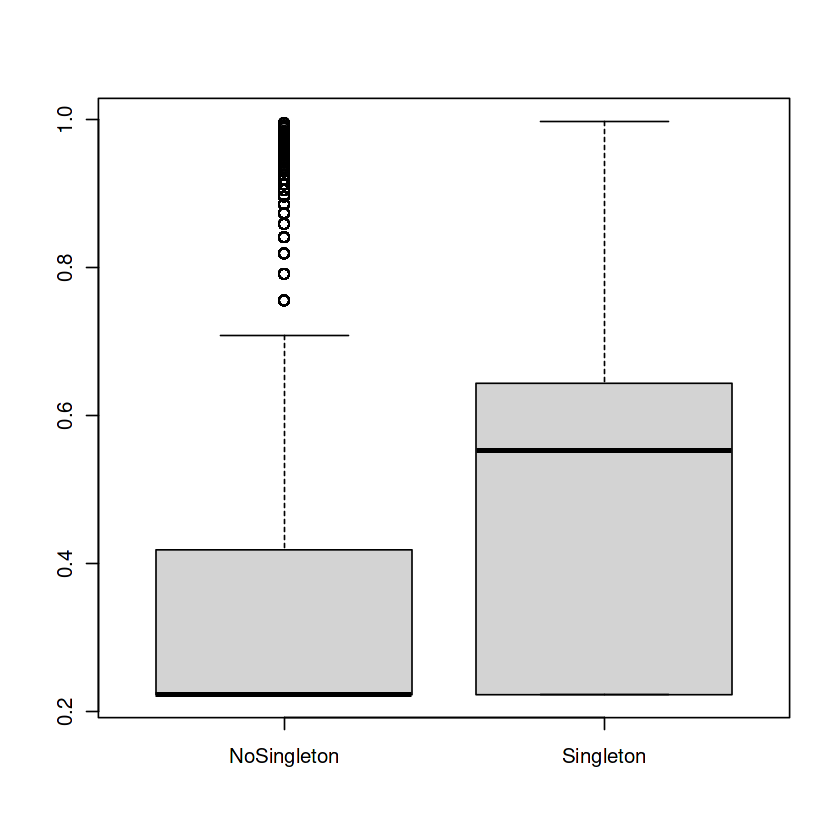

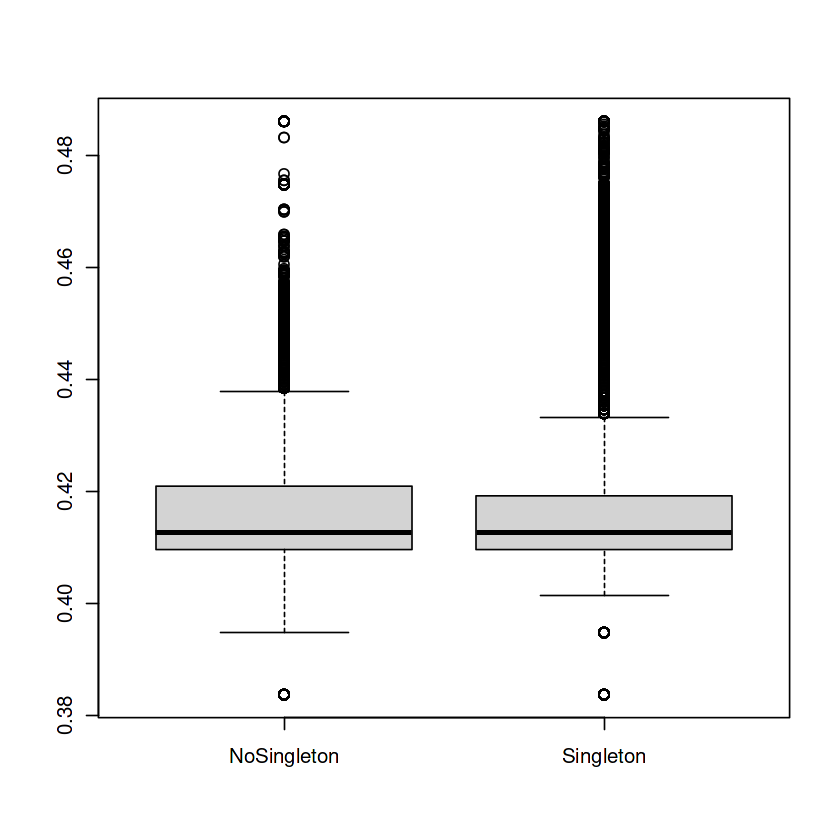

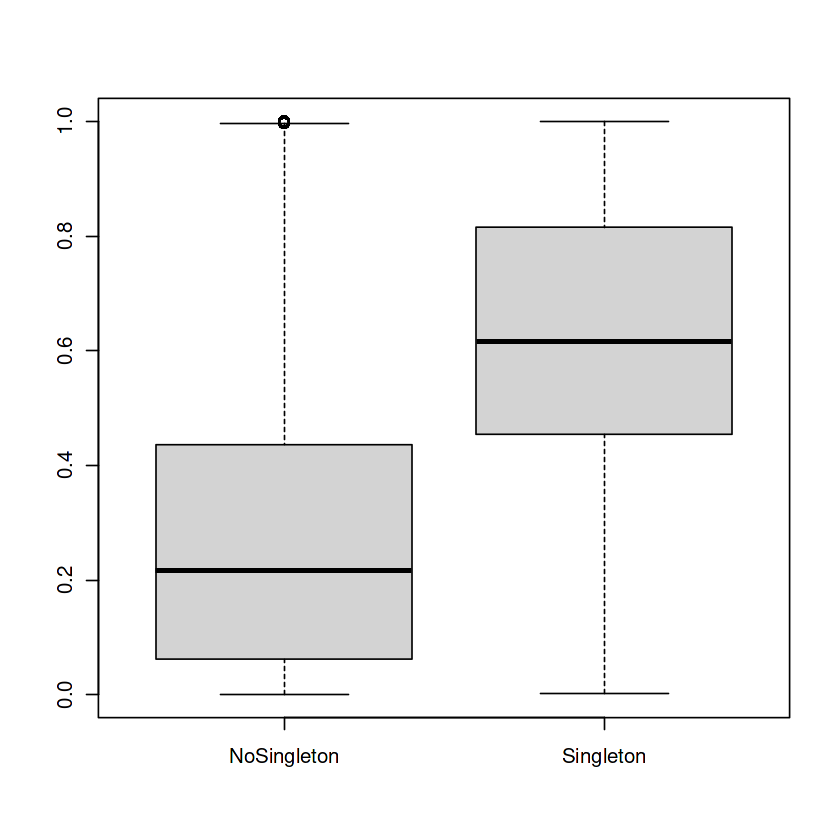

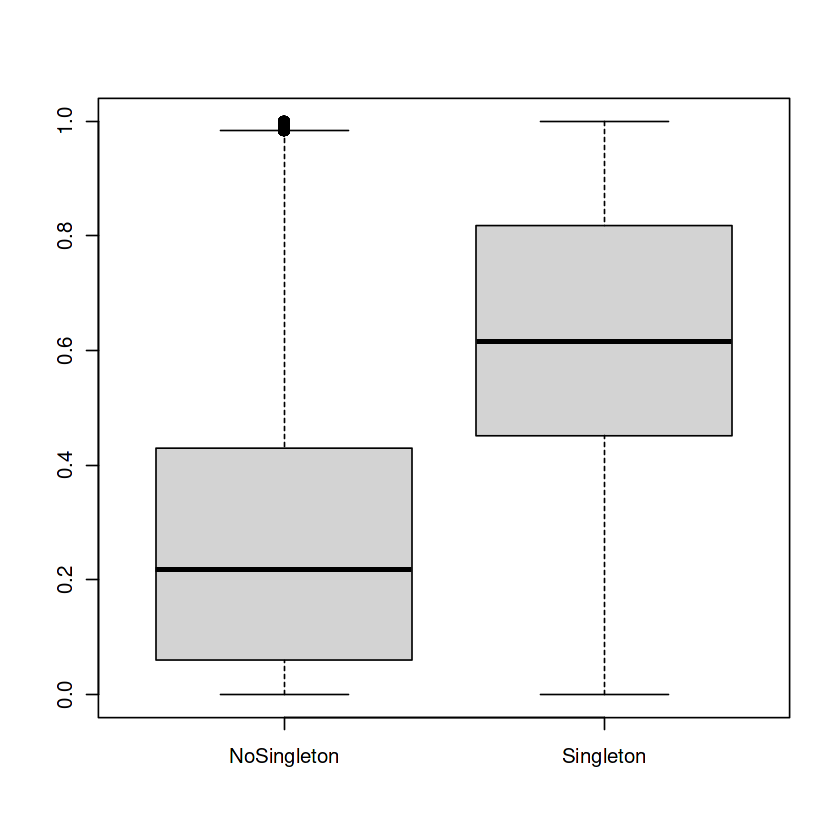

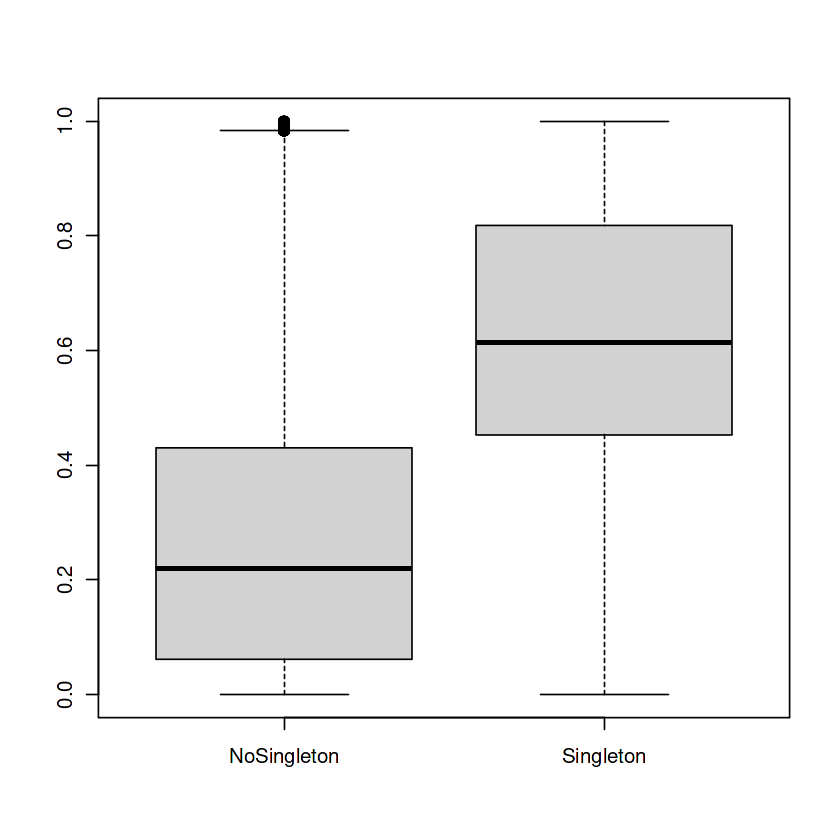

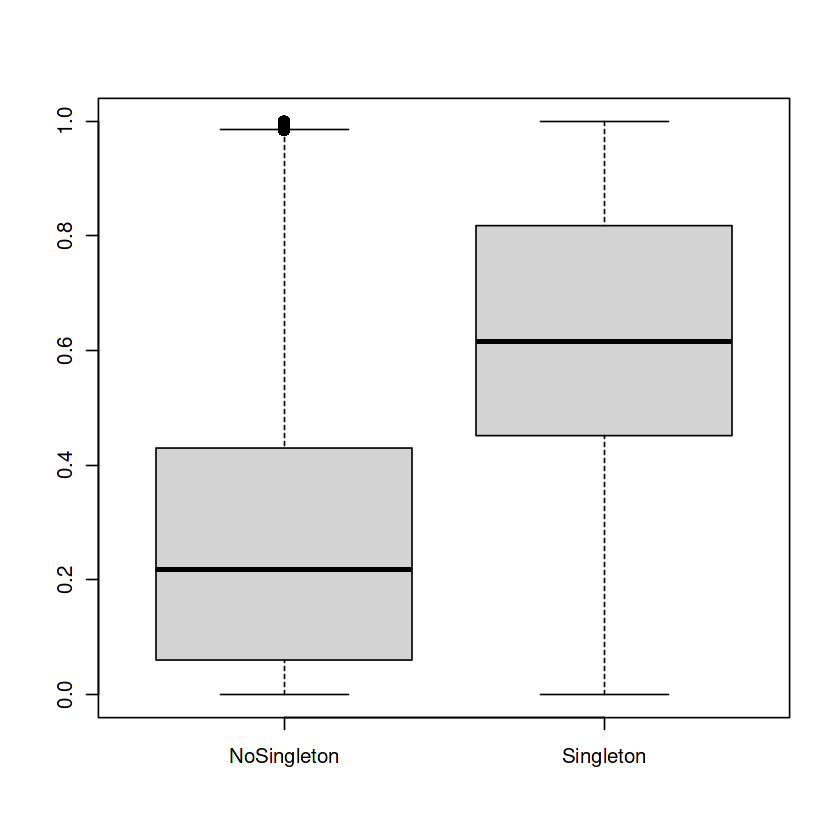

In [49]:
boxplot(split(glm1$fitted.values, train$Clase_factor))
boxplot(split(glm2$fitted.values, train$Clase_factor))
boxplot(split(glm3$fitted.values, train$Clase_factor))
boxplot(split(glm4$fitted.values, train$Clase_factor))
boxplot(split(glm5$fitted.values, train$Clase_factor))
boxplot(split(glm6$fitted.values, train$Clase_factor))


### Gráfico de Violín

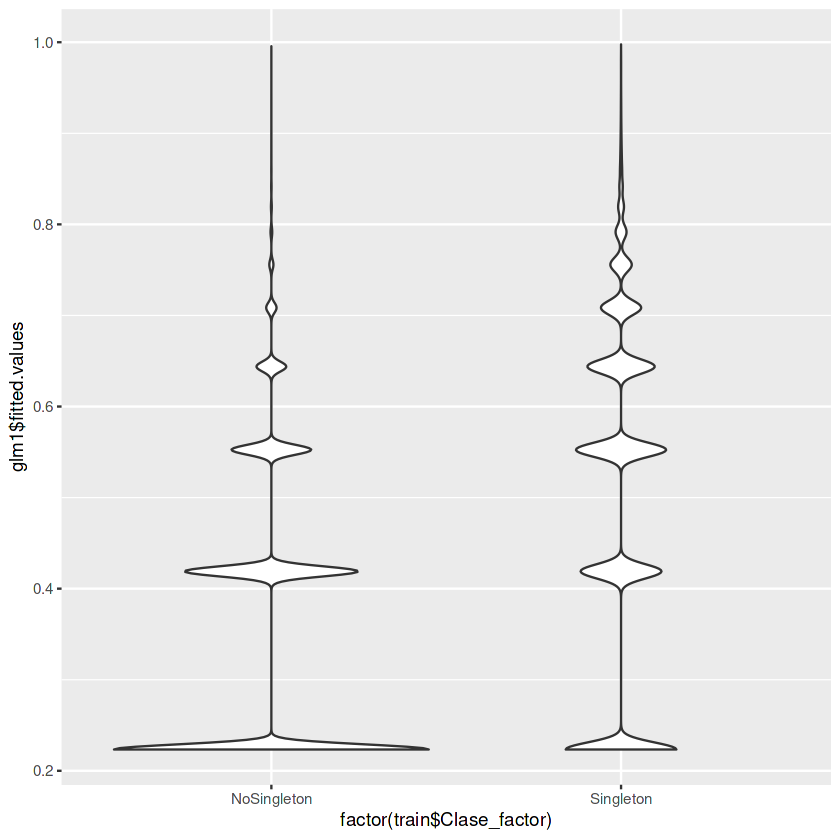

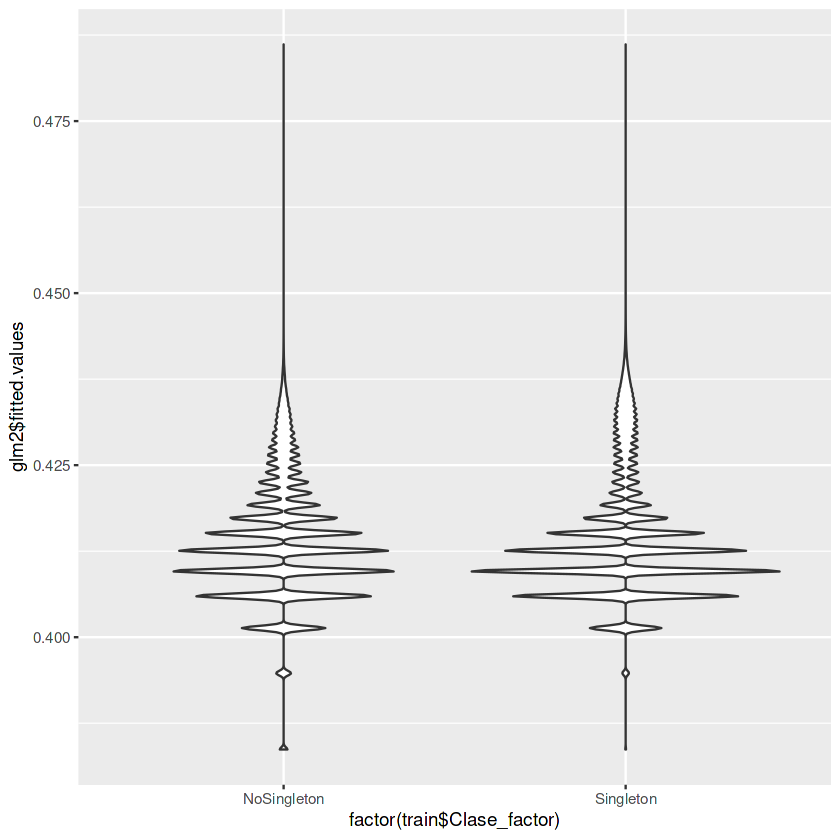

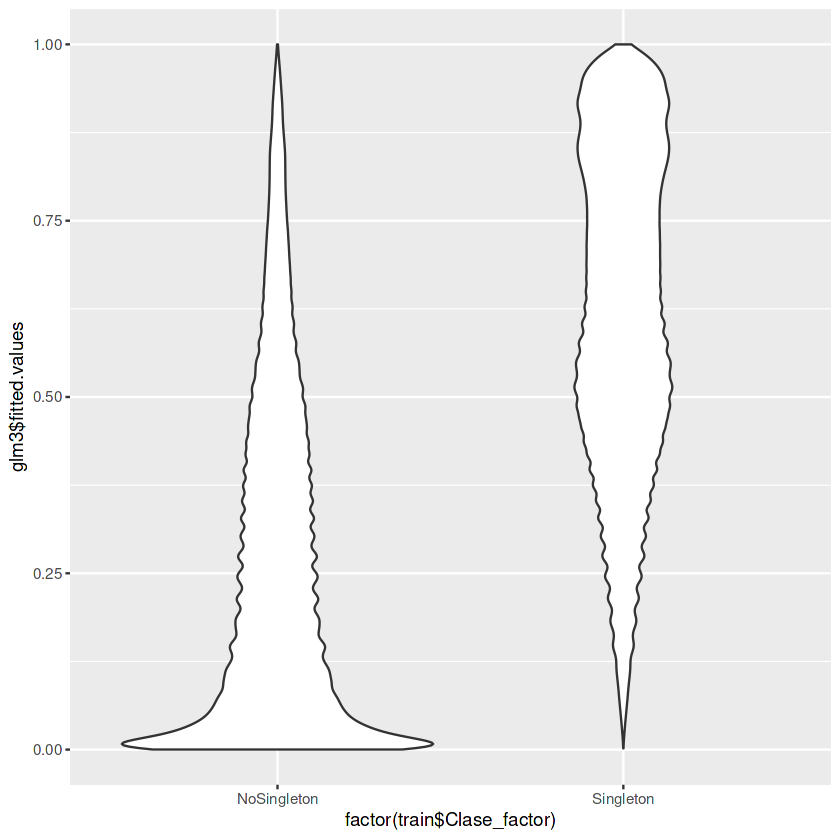

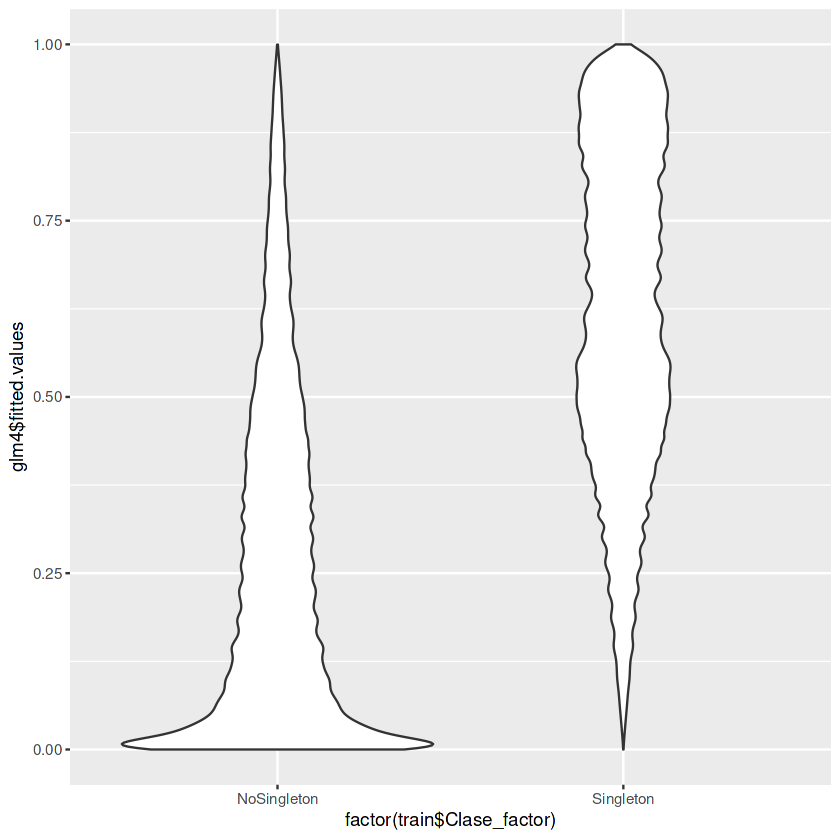

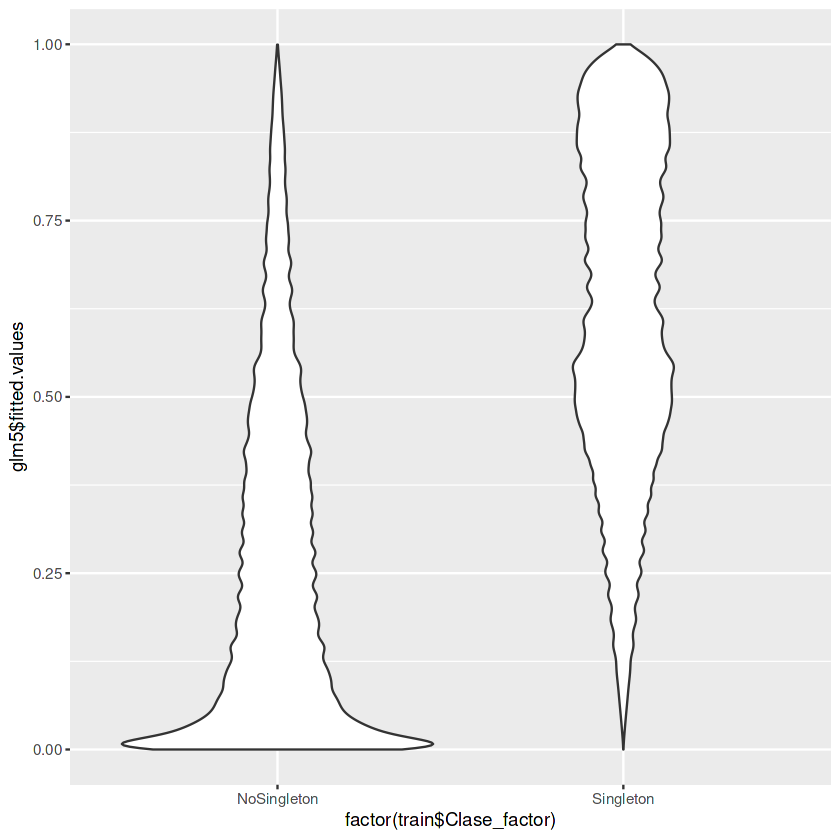

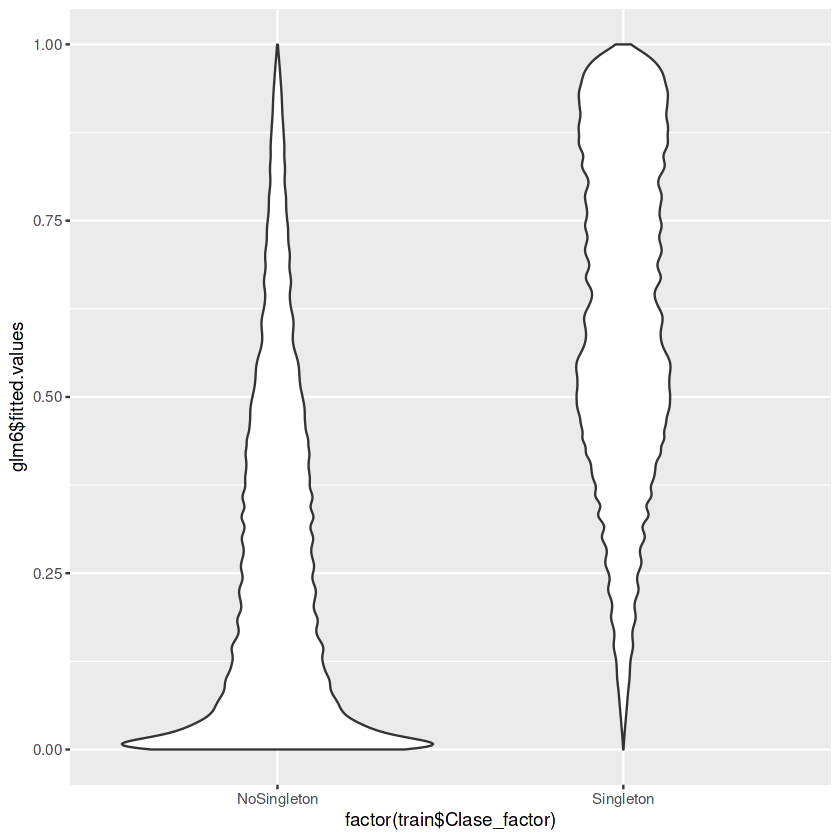

In [50]:
viodat<-data.frame(glm1$fitted.values, train$Clase_factor)
p <- ggplot(viodat, aes(factor(train$Clase_factor), glm1$fitted.values))
p + geom_violin()

viodat<-data.frame(glm2$fitted.values, train$Clase_factor)
p <- ggplot(viodat, aes(factor(train$Clase_factor), glm2$fitted.values))
p + geom_violin()

viodat<-data.frame(glm3$fitted.values, train$Clase_factor)
p <- ggplot(viodat, aes(factor(train$Clase_factor), glm3$fitted.values))
p + geom_violin()

viodat<-data.frame(glm4$fitted.values, train$Clase_factor)
p <- ggplot(viodat, aes(factor(train$Clase_factor), glm4$fitted.values))
p + geom_violin()

viodat<-data.frame(glm5$fitted.values, train$Clase_factor)
p <- ggplot(viodat, aes(factor(train$Clase_factor), glm5$fitted.values))
p + geom_violin()

viodat<-data.frame(glm6$fitted.values, train$Clase_factor)
p <- ggplot(viodat, aes(factor(train$Clase_factor), glm6$fitted.values))
p + geom_violin()

## Grafico de Hosmer-Lemenshaw

src: https://youtu.be/30qrTclOyuc?t=261secu[-1]-1/N/2

In [51]:
# pred -> glm2$fitted.values
# ppObs -> train$Clase_factor

###################
# How do we SEE the fit ?????
# Hosmer-Lemenshaw plot
#####################
#var<-as.numeric(train$Clase_factor == "Singleton") # target variable
#N<-10 # number of bins
#secu<-c(-0.00001,(1:N)/N) # sequence of breakpoints
#grupos<-cut(glm2$fitted.values,secu) # grouping predicted in bins
#valores<-unlist(lapply(split(var,grupos),mean))
#cexs<-unlist(lapply(split(var,grupos),sum))
#plot(secu[-1]-1/N/2,valores,pch=16,xlim=c(0,1),ylim=c(0,1),xlab='Predicted Probability',ylab='Observed Frecuency')
#abline(0,1)

In [52]:
Hosmer_Lemeshow_plot <- function(dataset, predicted_column, class_column, bins, positive_value, color='forestgreen', nudge_x=0, nudge_y=0.05){
  # Asignar los grupos a las observaciones de acuerdo a la probabilidad predicha
  dataset['group'] <- bin(dataset[predicted_column], nbins = bins, method = 'l', labels=c(1:bins))
  # Contar la cantidad de casos positivos por grupo
  positive_class <- dataset %>% filter(!!sym(class_column)==positive_value) %>% group_by(group) %>% count()
  # Obtener la media de las predicciones por grupo
  HL_df <- dataset %>% group_by(group) %>% summarise(pred=mean(!!sym(predicted_column)), count=n()) %>%
            inner_join(.,positive_class) %>%
            mutate(freq=n/count)
  # Gráfico 
  HM_plot <- ggplot(HL_df, aes(x=pred, y=freq)) + 
    geom_point(aes(size=n), color=color) +
    geom_text(aes(label=n),nudge_y = nudge_y)+
    geom_abline(slope = 1, intercept = 0, linetype='dashed') + 
    theme_bw() +
    labs(title='Hosmer-Lemeshow', size='Casos', x="Probabilidad Predicha", y="Frecuencia observada")
  return(HM_plot)
}

Joining, by = "group"
Joining, by = "group"


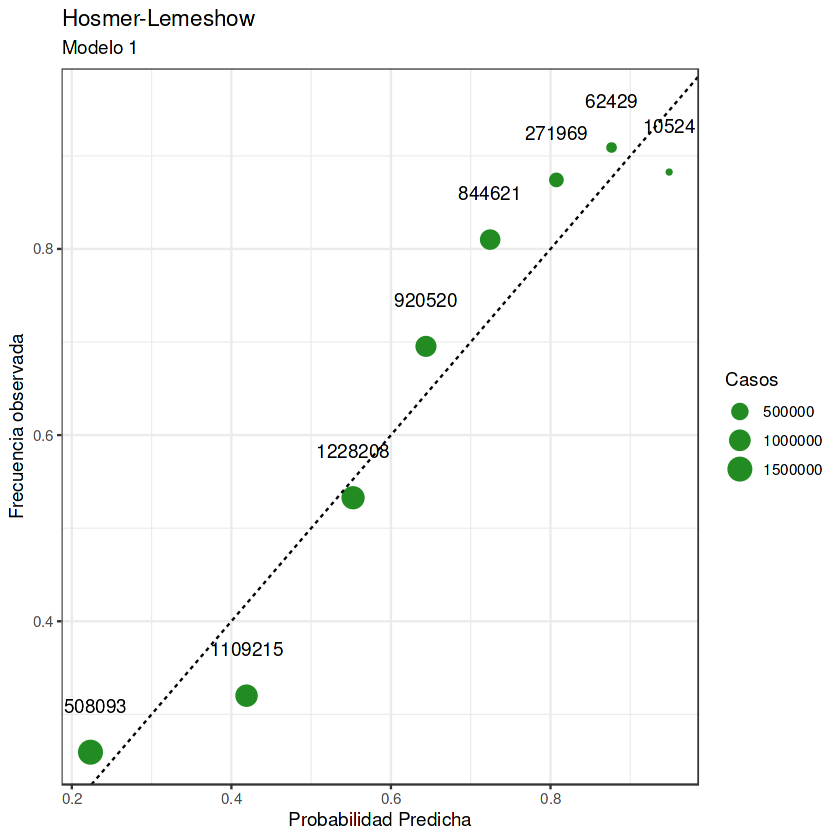

Joining, by = "group"


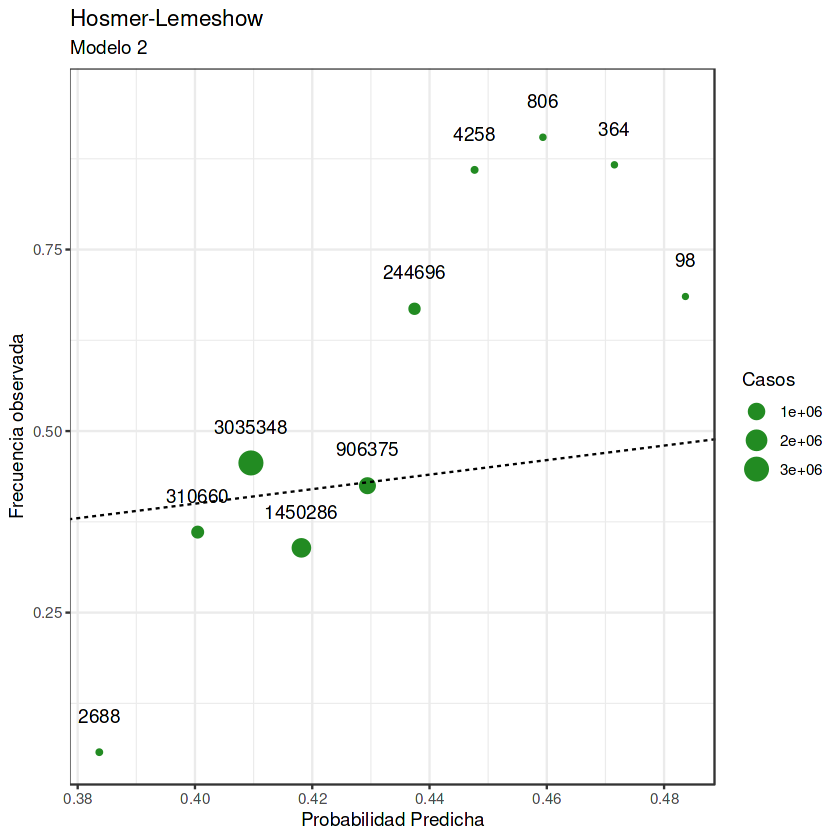

Joining, by = "group"


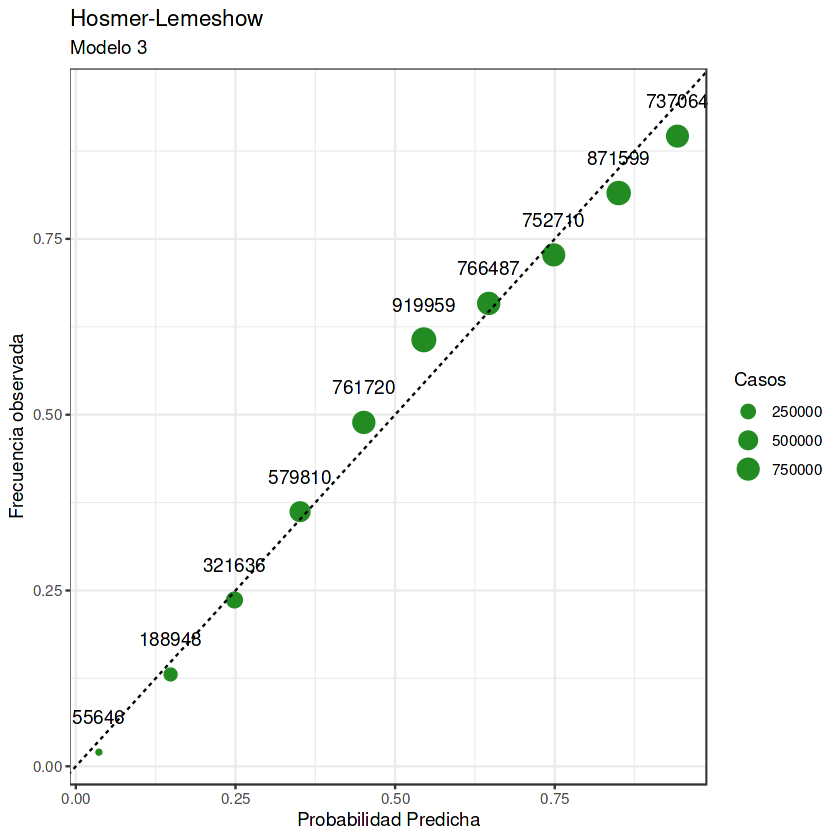

Joining, by = "group"


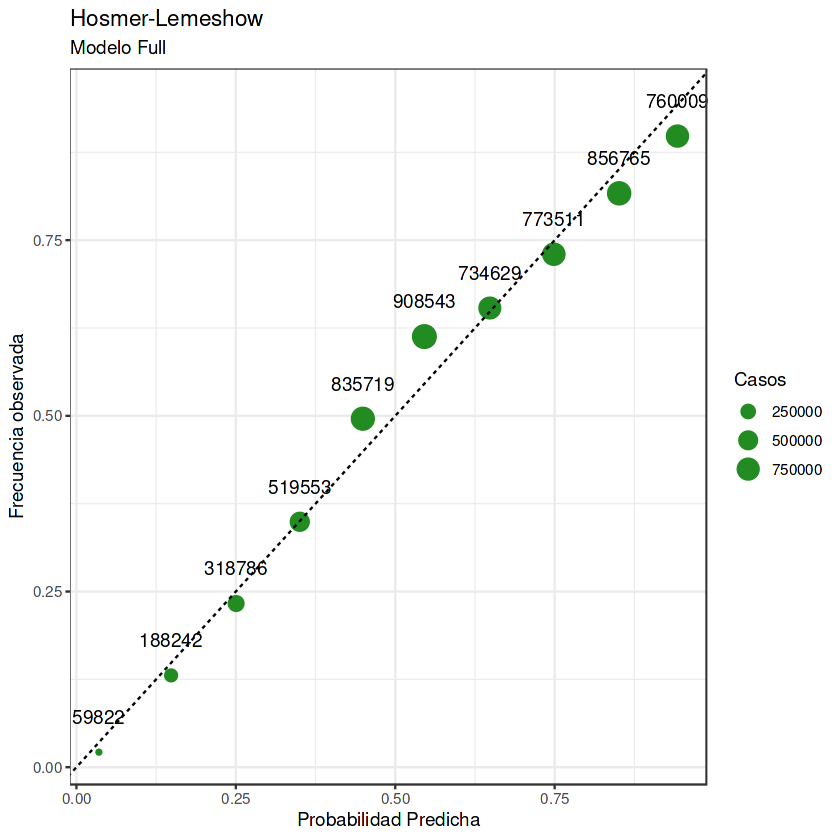

Joining, by = "group"


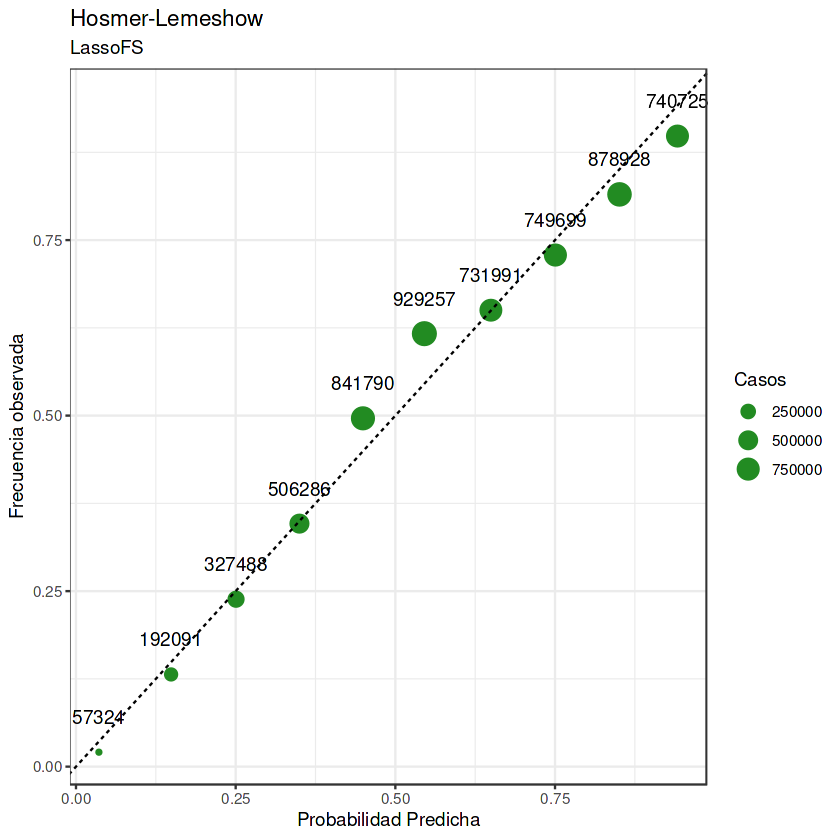

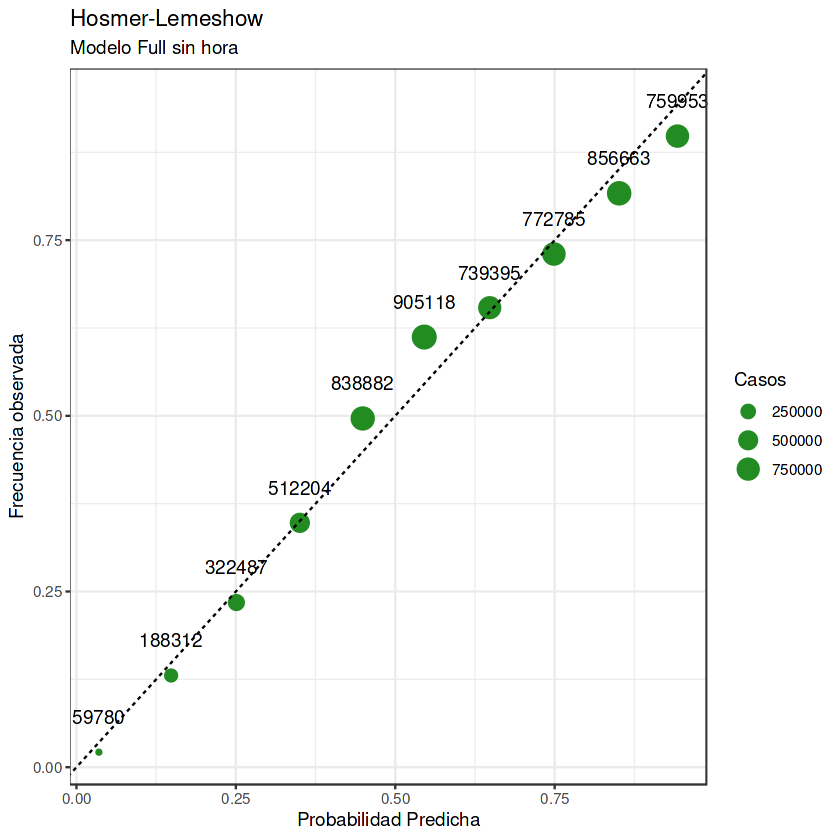

In [53]:
Hosmer_Lemeshow_plot(train %>% add_column(.fitted = glm1$fitted.values), '.fitted', 'Clase_num', 10, 1) +
  labs(subtitle="Modelo 1")

Hosmer_Lemeshow_plot(train %>% add_column(.fitted = glm2$fitted.values), '.fitted', 'Clase_num', 10, 1) +
  labs(subtitle="Modelo 2")

Hosmer_Lemeshow_plot(train %>% add_column(.fitted = glm3$fitted.values), '.fitted', 'Clase_num', 10, 1) +
  labs(subtitle="Modelo 3")

Hosmer_Lemeshow_plot(train %>% add_column(.fitted = glm4$fitted.values), '.fitted', 'Clase_num', 10, 1) +
  labs(subtitle="Modelo Full")

Hosmer_Lemeshow_plot(train %>% add_column(.fitted = glm5$fitted.values), '.fitted', 'Clase_num', 10, 1) +
  labs(subtitle="LassoFS")

Hosmer_Lemeshow_plot(train %>% add_column(.fitted = glm6$fitted.values), '.fitted', 'Clase_num', 10, 1) +
  labs(subtitle="Modelo Full sin hora")

In [54]:
# The same, but with size proportional to number of cases
#N<-10
#secu<-c(-0.00001,(1:N)/N)
#grupos<-cut(glm2$fitted.values,secu)
#valores<-unlist(lapply(split(var,grupos),mean))
#cexs<-unlist(lapply(split(var,grupos),sum))
#maxCex<-max(cexs)
#minCex<-min(cexs)
#plot(secu[-1]-1/N/2,valores,pch=16,xlim=c(0,1),ylim=c(0,1),xlab='Predicted Probability',ylab='Observed Frecuency',cex=4*(cexs-minCex)/maxCex,col='green')
#abline(0,1)
#identify(secu[-1]-1/N/2,valores,cexs,cex=1.5)


## Curva ROC

In [55]:
# pred -> glm2$fitted.values
# ppObs -> train$Clase_factor

#pred.roc <- prediction(glm2$fitted.values, train$Clase_factor)
#perf <- performance(pred.roc, measure = "tpr", x.measure = "fpr") 
#plot(perf, main="Curva ROC para Lluvia", colorize=TRUE,
#     xlab="False Positive Rate", ylab="True Positive Rate", box.lty=7, box.lwd=5,
#     box.col="gold", lwd=13, colorkey.relwidth=0.5, xaxis.cex.axis=1.5,
#     xaxis.col='blue', xaxis.col.axis="blue", yaxis.col='green', yaxis.cex.axis=1.5,
#     yaxis.at=c(0,0.5,0.8,0.85,0.9,1), yaxis.las=1, xaxis.lwd=2, yaxis.lwd=3,
#     yaxis.col.axis="orange", cex.lab=1.5, cex.main=2)
# Hay que agregar AUC

## Curvas ROC versión clase práctica

Usan otra libreria que parece mas potente

In [56]:
roc_modelo1 <- roc(response=train$Clase_num, predictor=glm1$fitted.values)
roc_modelo2 <- roc(response=train$Clase_num, predictor=glm2$fitted.values)
roc_modelo3 <- roc(response=train$Clase_num, predictor=glm3$fitted.values)
roc_full <- roc(response=train$Clase_num, predictor=glm4$fitted.values)
roc_lassofs <- roc(response=train$Clase_num, predictor=glm5$fitted.values)
roc_fullsinhora <- roc(response=train$Clase_num, predictor=glm6$fitted.values)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



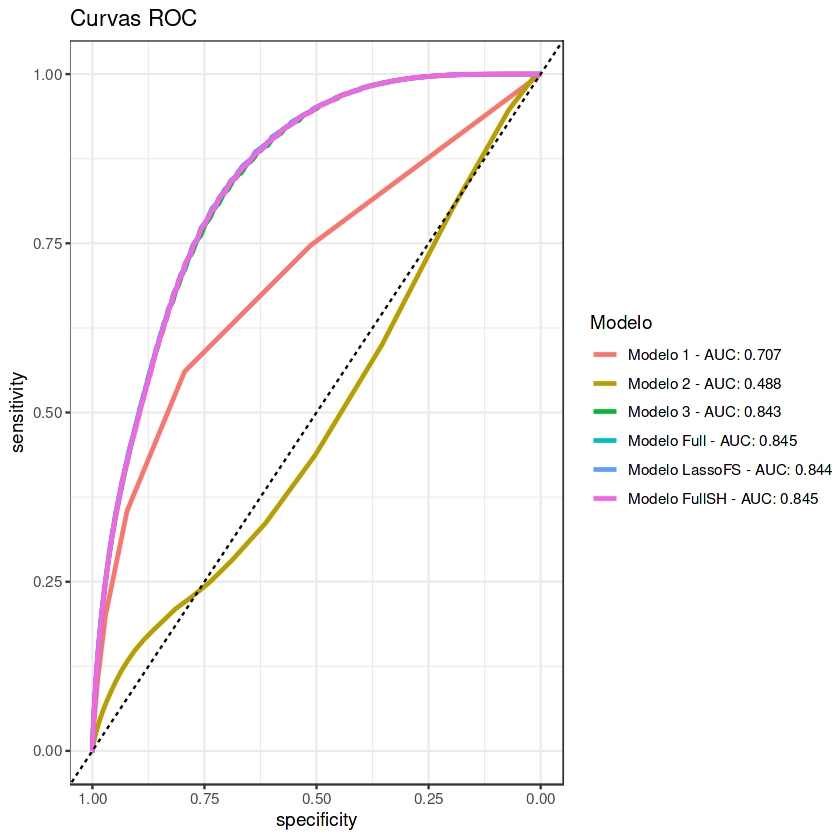

In [57]:
leyenda <- list(
    paste0("Modelo 1 - AUC: ", round(roc_modelo1$auc,3)),
    paste0("Modelo 2 - AUC: ", round(roc_modelo2$auc,3)),
    paste0("Modelo 3 - AUC: ", round(roc_modelo3$auc,3)),
    paste0("Modelo Full - AUC: ", round(roc_full$auc,3)),
    paste0("Modelo LassoFS - AUC: ", round(roc_lassofs$auc,3)),
    paste0("Modelo FullSH - AUC: ", round(roc_fullsinhora$auc,3))
)

ggroc(list(mod1=roc_modelo1, mod2=roc_modelo2, mod3=roc_modelo3, full=roc_full, fullsh=roc_fullsinhora, lassofs=roc_lassofs), size=1) + 
  geom_abline(slope = 1, intercept = 1, linetype='dashed') +
  theme_bw() + 
  labs(title='Curvas ROC', color='Modelo') +
  scale_color_discrete(labels=leyenda)

## Puntos de corte

In [58]:
#prediction_full <- train %>% add_column(.fitted = glm5$fitted.values)
prediction_df_glm1 <- train %>% add_column(.fitted = glm1$fitted.values)
prediction_df_glm2 <- train %>% add_column(.fitted = glm2$fitted.values)
prediction_df_glm3 <- train %>% add_column(.fitted = glm3$fitted.values)
prediction_df_glm4 <- train %>% add_column(.fitted = glm4$fitted.values)
prediction_df_glm5 <- train %>% add_column(.fitted = glm5$fitted.values)
prediction_df_glm6 <- train %>% add_column(.fitted = glm6$fitted.values)


In [59]:
prediction_metrics <- function(cutoff, predictions=prediction_full){
  tab <- predictions %>% 
    mutate(predicted_class = if_else(.fitted > cutoff, 1, 0),
           Clase_num = factor(Clase_num))
  confusionMatrix(table(tab$predicted_class, tab$Clase_num), positive = "1") %>%
    tidy() %>%
    select(term, estimate) %>%
    filter(term %in% c('accuracy', 'sensitivity', 'specificity', 'precision')) %>%
    mutate(cutoff = cutoff)
}

In [60]:
cutoffs = seq(0.05,0.95,0.01)

#message("GLM1")
#logit_pred_glm1 = map_df(cutoffs, ~prediction_metrics(.x, predictions = prediction_df_glm1)) %>% 
#  mutate(term = as.factor(term), estimate = round(estimate, 3))

#message("GLM2")
#logit_pred_glm2 = map_df(cutoffs, ~prediction_metrics(.x, predictions = prediction_df_glm2)) %>% 
#  mutate(term = as.factor(term), estimate = round(estimate, 3))

#message("GLM3")
#logit_pred_glm3 = map_df(cutoffs, ~prediction_metrics(.x, predictions = prediction_df_glm3)) %>% 
#  mutate(term = as.factor(term), estimate = round(estimate, 3))

message("GLM4")
logit_pred_glm4 = map_df(cutoffs, ~prediction_metrics(.x, predictions = prediction_df_glm4)) %>% 
  mutate(term = as.factor(term), estimate = round(estimate, 3))

message("GLM5")
logit_pred_glm5 = map_df(cutoffs, ~prediction_metrics(.x, predictions = prediction_df_glm5)) %>% 
  mutate(term = as.factor(term), estimate = round(estimate, 3))

message("GLM6")
logit_pred_glm6 = map_df(cutoffs, ~prediction_metrics(.x, predictions = prediction_df_glm6)) %>% 
  mutate(term = as.factor(term), estimate = round(estimate, 3))

GLM4

GLM5

GLM6



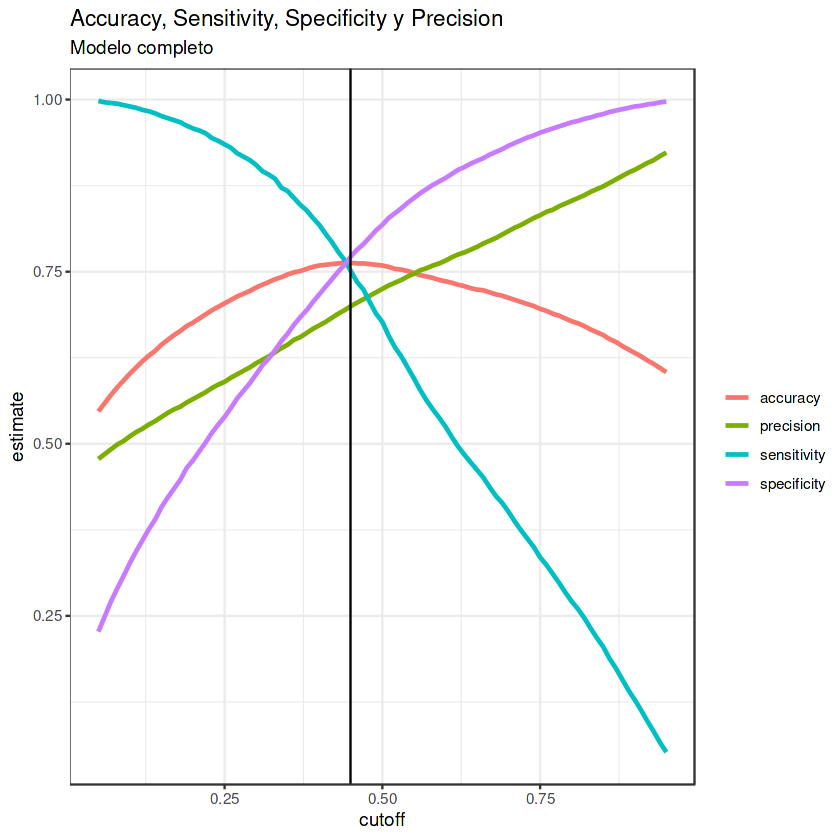

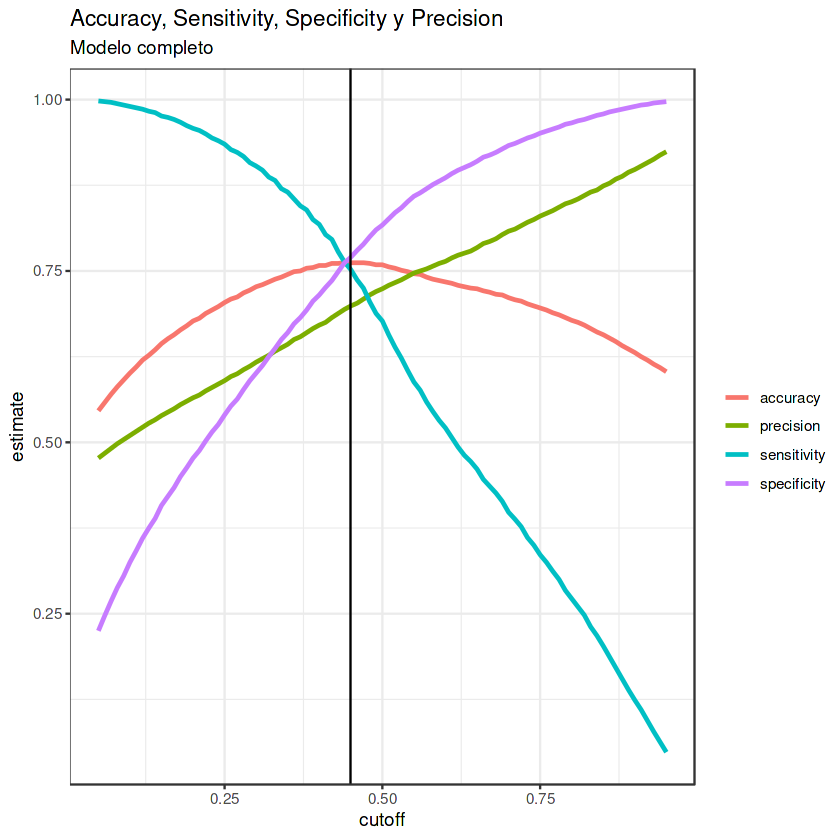

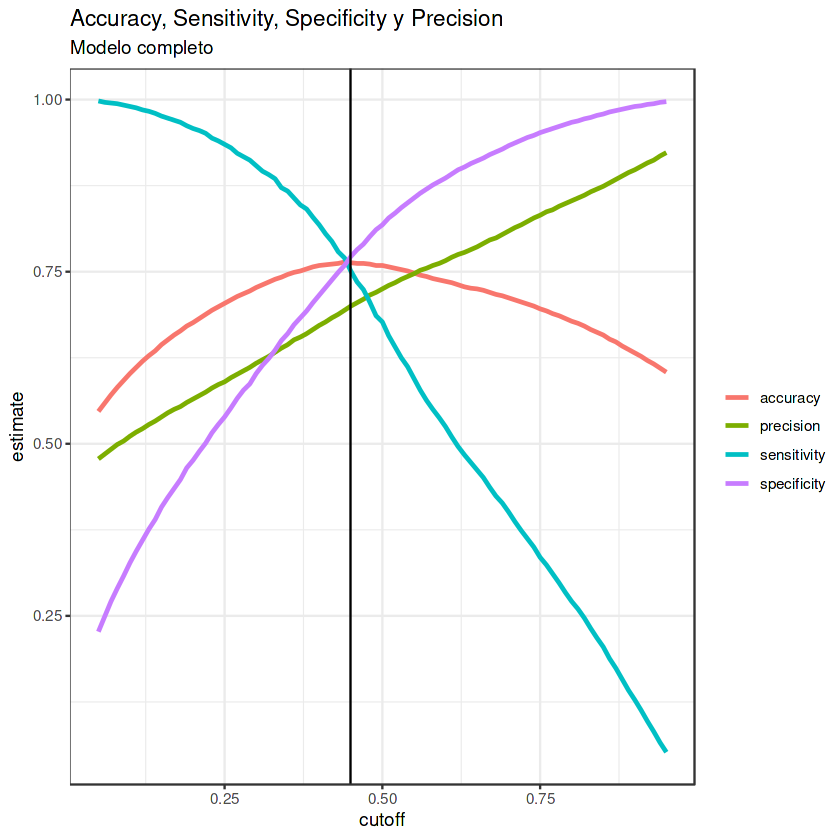

In [61]:
ggplot(logit_pred_glm4, aes(cutoff,estimate, group=term, color=term)) + geom_line(linewidth=1) +
  theme_bw() +
  labs(title= 'Accuracy, Sensitivity, Specificity y Precision', subtitle= 'Modelo completo', color="") +
  geom_vline(xintercept = 0.45)

ggplot(logit_pred_glm5, aes(cutoff,estimate, group=term, color=term)) + geom_line(linewidth=1) +
  theme_bw() +
  labs(title= 'Accuracy, Sensitivity, Specificity y Precision', subtitle= 'Modelo completo', color="") +
  geom_vline(xintercept = 0.45)

ggplot(logit_pred_glm6, aes(cutoff,estimate, group=term, color=term)) + geom_line(linewidth=1) +
  theme_bw() +
  labs(title= 'Accuracy, Sensitivity, Specificity y Precision', subtitle= 'Modelo completo', color="") +
  geom_vline(xintercept = 0.45)

Se elije el punto de corte 0.45, que es el punto donde se cruzan la sensibilidad y la especificidad para los modelos mas importantes

# Dataset de Testing

In [66]:
test$Clase_factor <- as.factor(test$Clase)

In [67]:
sel_cutoff = 0.45

# Predecimos para GLM4
table_glm4 = augment(x = glm4, newdata = test, type.predict='response')
table_glm4 = table_glm4 %>% 
  mutate(predicted_class = if_else(.fitted>sel_cutoff, "Singleton", "NoSingleton") %>% as.factor(), 
         Clase = Clase_factor)

# Predecimos para GLM4
table_glm5 = augment(x = glm5, newdata = test, type.predict='response')
table_glm5 = table_glm5 %>% 
  mutate(predicted_class = if_else(.fitted>sel_cutoff, "Singleton", "NoSingleton") %>% as.factor(), 
         Clase = Clase_factor)

# Predecimos para GLM4
table_glm6 = augment(x = glm6, newdata = test, type.predict='response')
table_glm6 = table_glm6 %>% 
  mutate(predicted_class = if_else(.fitted>sel_cutoff, "Singleton", "NoSingleton") %>% as.factor(), 
         Clase = Clase_factor)

In [68]:
# Creamos la matriz de confusión
message("Matriz de confusión para GLM4")
confusionMatrix(table(table_glm4$predicted_class, table_glm4$Clase), positive = "Singleton")

message("Matriz de confusión para GLM5")
confusionMatrix(table(table_glm5$predicted_class, table_glm5$Clase), positive = "Singleton")

message("Matriz de confusión para GLM6")
confusionMatrix(table(table_glm6$predicted_class, table_glm6$Clase), positive = "Singleton")


Matriz de confusión para GLM4



Confusion Matrix and Statistics

             
              NoSingleton Singleton
  NoSingleton     2776188    636198
  Singleton        819275   1917218
                                         
               Accuracy : 0.7633         
                 95% CI : (0.763, 0.7636)
    No Information Rate : 0.5847         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5176         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.7508         
            Specificity : 0.7721         
         Pos Pred Value : 0.7006         
         Neg Pred Value : 0.8136         
             Prevalence : 0.4153         
         Detection Rate : 0.3118         
   Detection Prevalence : 0.4450         
      Balanced Accuracy : 0.7615         
                                         
       'Positive' Class : Singleton      
     

Matriz de confusión para GLM5



Confusion Matrix and Statistics

             
              NoSingleton Singleton
  NoSingleton     2769410    633668
  Singleton        826053   1919748
                                          
               Accuracy : 0.7626          
                 95% CI : (0.7623, 0.7629)
    No Information Rate : 0.5847          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5164          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7518          
            Specificity : 0.7703          
         Pos Pred Value : 0.6992          
         Neg Pred Value : 0.8138          
             Prevalence : 0.4153          
         Detection Rate : 0.3122          
   Detection Prevalence : 0.4466          
      Balanced Accuracy : 0.7610          
                                          
       'Positive' Class : Si

Matriz de confusión para GLM6



Confusion Matrix and Statistics

             
              NoSingleton Singleton
  NoSingleton     2776144    636254
  Singleton        819319   1917162
                                          
               Accuracy : 0.7633          
                 95% CI : (0.7629, 0.7636)
    No Information Rate : 0.5847          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5176          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7508          
            Specificity : 0.7721          
         Pos Pred Value : 0.7006          
         Neg Pred Value : 0.8135          
             Prevalence : 0.4153          
         Detection Rate : 0.3118          
   Detection Prevalence : 0.4450          
      Balanced Accuracy : 0.7615          
                                          
       'Positive' Class : Si